<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Алгоритм" data-toc-modified-id="Алгоритм-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Алгоритм</a></span></li><li><span><a href="#Обучение-модели-по-исходным-признакам" data-toc-modified-id="Обучение-модели-по-исходным-признакам-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Обучение модели по исходным признакам</a></span></li><li><span><a href="#Обучение-модели-по-закодированным-признакам" data-toc-modified-id="Обучение-модели-по-закодированным-признакам-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Обучение модели по закодированным признакам</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Нужно защитить данные клиентов страховой компании «Хоть потоп». Разработаем такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. 

При преобразовании качество моделей машинного обучения не должно ухудшиться.

## Загрузка данных

In [1]:
import pandas as pd #импорт библиотек

import numpy as np

import random

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
try: # чтение файла с сайта
    df = pd.read_csv('/datasets/insurance.csv')
except: # чтение файла локально
    df = pd.read_csv('datasets/insurance.csv')

Обзор данных:

In [3]:
display(df.head())
print('--------------------------------------')
print('Размер:')
print(df.shape)
print('--------------------------------------')
print('Информация:')
print(df.info())
print('--------------------------------------')
print('Дубликаты:')
print(df.duplicated().sum())
print('--------------------------------------')
print('Пропуски:')
print(df.isna().sum())
print('--------------------------------------')
print('Описание данных:')
display(df.describe())


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


--------------------------------------
Размер:
(5000, 5)
--------------------------------------
Информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB
None
--------------------------------------
Дубликаты:
153
--------------------------------------
Пропуски:
Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64
--------------------------------------
Описание данных:


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Изменим тип данных на целочисленный. Там, где возможно, уменьшим занимаемый размер в памяти.

In [4]:
df[['Возраст', 'Пол', 'Члены семьи', 'Страховые выплаты'] # столбцы со значениями меньше 32767
] = df[['Возраст', 'Пол', 'Члены семьи', 'Страховые выплаты']
].astype('int16')
df['Зарплата'] = df['Зарплата'].astype('int32')
display(df.head())
print(df.info())

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41,49600,1,0
1,0,46,38000,1,1
2,0,29,21000,0,0
3,0,21,41700,2,0
4,1,28,26100,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Пол                5000 non-null   int16
 1   Возраст            5000 non-null   int16
 2   Зарплата           5000 non-null   int32
 3   Члены семьи        5000 non-null   int16
 4   Страховые выплаты  5000 non-null   int16
dtypes: int16(4), int32(1)
memory usage: 58.7 KB
None


Установлены оптимальные типы данных.

Посмотрим, как распределены значения в столбце "Возраст". Минимум и максимум в нём равны 18 и 65, это правдоподобно.

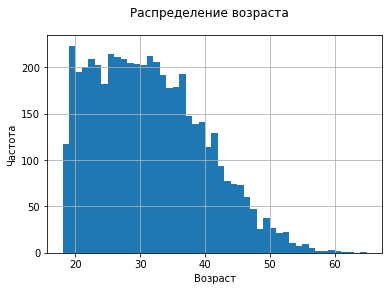

In [5]:
col = 'Возраст'
plt.suptitle("Распределение возраста")
plt.xlabel('Возраст')
plt.ylabel('Частота')
df[col].hist(bins = df[col].max()-df[col].min());

Распределение выглядит похожим на правду, близко к распределению Пуассона.

Посмотрим, как распределены значения в столбце "Зарплата". Минимум и максимум в нём равны 5300 и 79000.

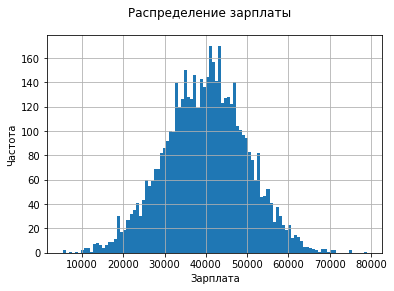

In [6]:
col = 'Зарплата'
plt.suptitle("Распределение зарплаты")
plt.xlabel('Зарплата')
plt.ylabel('Частота')
bins = 100
df[col].hist(bins = bins);

График напоминает нормальное распределение. 

Слишком низкие зарплаты - ниже прожиточного минимума - возможно, объясняются работой с частичной загрузкой.

Посмотрим, как распределены значения в столбце "Члены семьи". Минимум и максимум в нём равны 0 и 6.

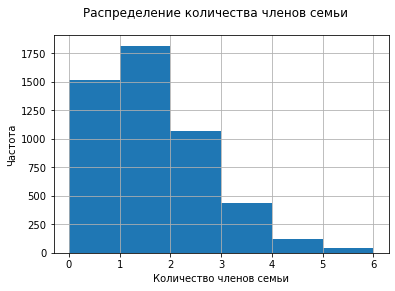

In [7]:
col = 'Члены семьи'
plt.suptitle("Распределение количества членов семьи")
plt.xlabel('Количество членов семьи')
plt.ylabel('Частота')
df[col].hist(bins = df[col].max()-df[col].min());

Посмотрим, как распределены значения в столбце "Страховые выплаты".

Минимум и максимум в нём равны 0 и 5.

Данный столбец содержит целевые признаки, которые наша линейная регрессия должна будет предсказать.

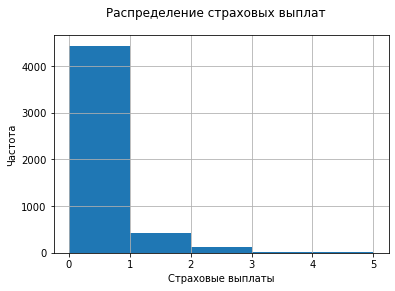

In [8]:
col = 'Страховые выплаты'
plt.suptitle("Распределение страховых выплат")
plt.xlabel('Страховые выплаты')
plt.ylabel('Частота')
df[col].hist(bins = df[col].max()-df[col].min());

Несмотря на небольшое количество вариантов, гистограмма напоминает распределение Пуассона, что логично в данном случае.

Чаще всего страховые выплаты клиентам не нужны, и большее количество выплат встречается всё реже.


Посмотрим на наименее часто встречающиеся значения:

In [9]:
df[df['Страховые выплаты'] >= 4]

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
228,1,65,39700,1,5
1568,1,59,32100,0,4
2240,0,60,27900,0,4
3117,0,60,43400,2,4
3209,1,59,51700,2,4
3674,1,59,29600,0,4
3907,1,61,39600,1,4
4019,0,62,14100,0,4


Значение 5 встречается только один раз. Это не позволит равномерно разделить выборки для обучения. Удалим эту строку, статистически одно значение из 5000 можно считать выбросом.

In [10]:
df = df.loc[df['Страховые выплаты'] != 5]
df[df['Страховые выплаты'] >= 4] # проверка

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
1568,1,59,32100,0,4
2240,0,60,27900,0,4
3117,0,60,43400,2,4
3209,1,59,51700,2,4
3674,1,59,29600,0,4
3907,1,61,39600,1,4
4019,0,62,14100,0,4


Рассмотрим дубликаты:

In [11]:
df[df.duplicated()]

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
281,1,39,48100,1,0
488,1,24,32900,1,0
513,0,31,37400,2,0
718,1,22,32600,1,0
785,0,20,35800,0,0
...,...,...,...,...,...
4793,1,24,37800,0,0
4902,1,35,38700,1,0
4935,1,19,32700,0,0
4945,1,21,45800,0,0


Дубликатов в датафрейме немного (153 из 5000).

Количество рассматриваемых параметров тоже небольшое, а самый вариативный из них - зарплата - округляется до 100.

Учитывая это, дубликаты могут быть реальным совпадением у нескольких человек пола, возраста, зарплаты и т.д. Из датафрейма их удалять не стоит, оставляем как есть. 

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения(вычисление весов признаков):

$$
w = (X^T X)^{-1} X^T y
$$

**Вопрос:**

Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?


**Ответ:** b. Не изменится. 

**Обоснование:** 
Возьмём формулу весов предсказания:

$$
w = (X^T X)^{-1} X^T y
$$

Заменим $X$ на $Z$, где:

$Z = XR$,

$R$ - некая квадратная матрица со стороной $n$, равной количеству признаков.

Новая формула весов предсказания:

$$w_1 = (Z^T Z)^{-1} Z^T y = ((XR)^T(XR))^{-1}(XR)^Ty$$

Согласно теореме транспонирования произведения:

$$(XR)^T = R^T X^T$$

Подставим в формулу:

$$w_1 = ((XR)^T(XR))^{-1}(XR)^Ty = (R^TX^TXR)^{-1}R^TX^Ty$$

Далее согласно свойству перестановки сомножителей:

$$w_1 =((R^TX^TX)R)^{-1}R^TX^Ty = R^{-1}(R^TX^TX)^{-1}R^TX^Ty = R^{-1}(X^TX)^{-1}(R^T)^{-1}R^TX^Ty$$

Поскольку произведение матрицы на обратную себе даёт единичную матрицу, а её произведение на любую даёт эту любую, то $(R^T)^{-1}R^T$ можно сократить:

$$w_1 = R^{-1}(X^TX)^{-1}X^Ty$$

Подставим в формулу предсказания:

$$
a_1 = Zw_1 = XRR^{-1}(X^TX)^{-1}X^Ty 
$$

Сократим $RR^{-1}$:

$$
a_1 = X(X^TX)^{-1}X^Ty
$$

Изначальные веса:

$$
w = (X^T X)^{-1} X^T y
$$

Следовательно:
$$
a_1 = Xw = a
$$

Что и требовалось доказать, предсказания равны, несмотря на умножение на случайную квадратную обратимую матрицу.

## Алгоритм преобразования

**Алгоритм**

1) Выделим из датафрейма признаки и целевой признак.

2) Преобразуем датафрейм с признаками в матрицу признаков.

3) Умножим матрицу признаков на случайную квадратную обратимую матрицу со стороной, равной количеству признаков. Это произведение будет новой матрицей признаков.

4) Произведём обучение модели на новой матрице признаков

**Обоснование**

Поскольку вектор предсказаний не меняется от умножения на случайную матрицу, качество предсказания не изменится.

## Проверка алгоритма

### Подготовка данных

Выделение признаков из исходного датафрейма:

In [12]:
features = df.drop('Страховые выплаты', axis=1).values # выделяем признаки, преобразуем в матрицу.
target = df['Страховые выплаты'].values

### Алгоритм

Запрограммируем функцию кодирования:

In [13]:
def features_coding(features):
    global rnd_num   # фиксируем ключ шифрования
    rnd_num = random.randrange(1000000)   # генерируем случайное число для RandomState
    rng = np.random.RandomState(rnd_num)
    global random_matrix   # запоминаем случайную матрицу на случай, если понадобится для расшифровки
    random_matrix = rng.normal(size=(features.shape[1], features.shape[1])) # генерируем случайную матрицу
    try:   # проверка обратимости сгенерированной матрицы
        inverted_matrix = np.linalg.inv(random_matrix)
        print("Признаки преобразованы. Можно идти дальше")
        features = features @ random_matrix
        return features 
    except:   # если матрица не обратима, попробуем снова
        return features_coding(features)

### Обучение модели по исходным признакам

Разделение данных на обучающую и валидационную выборку:

In [14]:
features_train, features_test, target_train, target_test = train_test_split(
features, target, test_size=0.33, random_state=123456, stratify=target)
print(features_train.shape, features_test.shape)   #проверка размеров

(3349, 4) (1650, 4)


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Отличная работа!👍:</b> 
    
Круто, что продолжаешь следовать всем канонам машинного обучения и делишь выборку на тестовую и тренировочную! Уважаю :)

In [15]:
model = LinearRegression(normalize=True)
model.fit(features_train, target_train)
predicted = model.predict(features_test)
r2_raw = r2_score(target_test, predicted)
print("Значение R2 для исходных данных:", r2_raw)

Значение R2 для исходных данных: 0.4241966164210276


### Обучение модели по закодированным признакам

Применение алгоритма кодирования:

In [16]:
features = features_coding(features)

Признаки преобразованы. Можно идти дальше


Проверка кодирования признаков и защиты персональных данных:

In [17]:
features

array([[ 48881.99642101, -20714.88160593,  38709.7679236 ,
         28917.55717787],
       [ 37454.08826884, -15868.86749428,  29656.99143393,
         22136.40960062],
       [ 20699.72897232,  -8770.25845476,  16390.21643179,
         12229.30828788],
       ...,
       [ 33405.29465878, -14156.16767119,  26454.64835156,
         19772.78454865],
       [ 32224.56911374, -13653.77470401,  25517.61922603,
         19069.2697713 ],
       [ 40010.48391651, -16956.22879177,  31685.35428953,
         23677.11828945]])

По этим данным невозможно узнать исходные персональные данные клиентов, защита работает.

А сможем ли мы восстановить данные при необходимости? Проверим, сохранилась ли случайная матрица, на которую умножали признаки, и ключ шифрования. 

In [18]:
print(rnd_num)
print(random_matrix)

963066
[[ 1.13204429 -0.40967244  0.4265507   0.4111259 ]
 [ 0.35015363  0.05141628  0.06153577 -1.21316117]
 [ 0.98521783 -0.41770236  0.78040152  0.58402333]
 [-0.29649563  1.45697693 -1.09692526 -0.67158311]]


Всё в порядке.

Разделение данных на обучающую и валидационную выборку:

In [19]:
features_train, features_test, target_train, target_test = train_test_split(
features, target, test_size=0.33, random_state=123456, stratify=target)
print(features_train.shape, features_test.shape) #проверка размеров

(3349, 4) (1650, 4)


In [20]:
model = LinearRegression(normalize=True)
model.fit(features_train, target_train)
predicted = model.predict(features_test)
r2_coded = r2_score(target_test, predicted)
print("Значение R2 для преобразованных данных:", r2_coded)
if np.isclose(r2_coded, r2_raw):   # проверяем равенство в приближении 1e-08
    print('R2 моделей равны.')
else:
    print('R2 моделей отличаются.')

Значение R2 для преобразованных данных: 0.4241966164211306
R2 моделей равны.


### Вывод:
- При кодировании данных признаки имеют вид, по которому невозможно получить доступ к персональным данным клиентов, не зная случайную матрицу, использованнную при кодировании.
- Качество предсказания модели согласно признаку R2 истаётся неизменным.
- Кодирование данных прошло успешно.